In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [5]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
!unzip MHEALTHDATASET.zip

--2021-03-10 11:10:38--  http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75567983 (72M) [application/x-httpd-php]
Saving to: ‘MHEALTHDATASET.zip’

MHEALTHDATASET.zip  100%[===================>]  72.07M  43.6MB/s    in 1.7s    

2021-03-10 11:10:40 (43.6 MB/s) - ‘MHEALTHDATASET.zip’ saved [75567983/75567983]

Archive:  MHEALTHDATASET.zip
   creating: MHEALTHDATASET/
  inflating: MHEALTHDATASET/mHealth_subject1.log  
  inflating: MHEALTHDATASET/mHealth_subject10.log  
  inflating: MHEALTHDATASET/mHealth_subject2.log  
  inflating: MHEALTHDATASET/mHealth_subject3.log  
  inflating: MHEALTHDATASET/mHealth_subject4.log  
  inflating: MHEALTHDATASET/mHealth_subject5.log  
  inflating: MHEALTHDATASET/mHealth_subject6.log  
  inflating: MHEALTHDATASE

In [6]:
df = pd.DataFrame()
#loop to combine all data
for i in range(1,11):
    df1 = pd.read_csv(f'MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
    df1 = df1.loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]]
    df1 = df1.rename(columns={
        5:"alx", 6:"aly", 7:"alz", 8:"glx", 9:"gly", 10:"glz", 14:"arx",15:"ary", 16:"arz", 17:"grx", 18:"gry", 19:"grz", 23:"Activity"
        })
    df1['subject'] = 'subject'+str(i)
    df = pd.concat([df,df1])

In [ ]:
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98299,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
98300,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
98301,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
98302,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [7]:
df.Activity.value_counts()


0     872550
11     30720
10     30720
9      30720
5      30720
4      30720
3      30720
2      30720
1      30720
7      29441
8      29337
6      28315
12     10342
Name: Activity, dtype: int64

In [8]:
from sklearn.utils import resample
 
df_majority = df[df.Activity==0]
df_minorities = df[df.Activity!=0]
 
df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

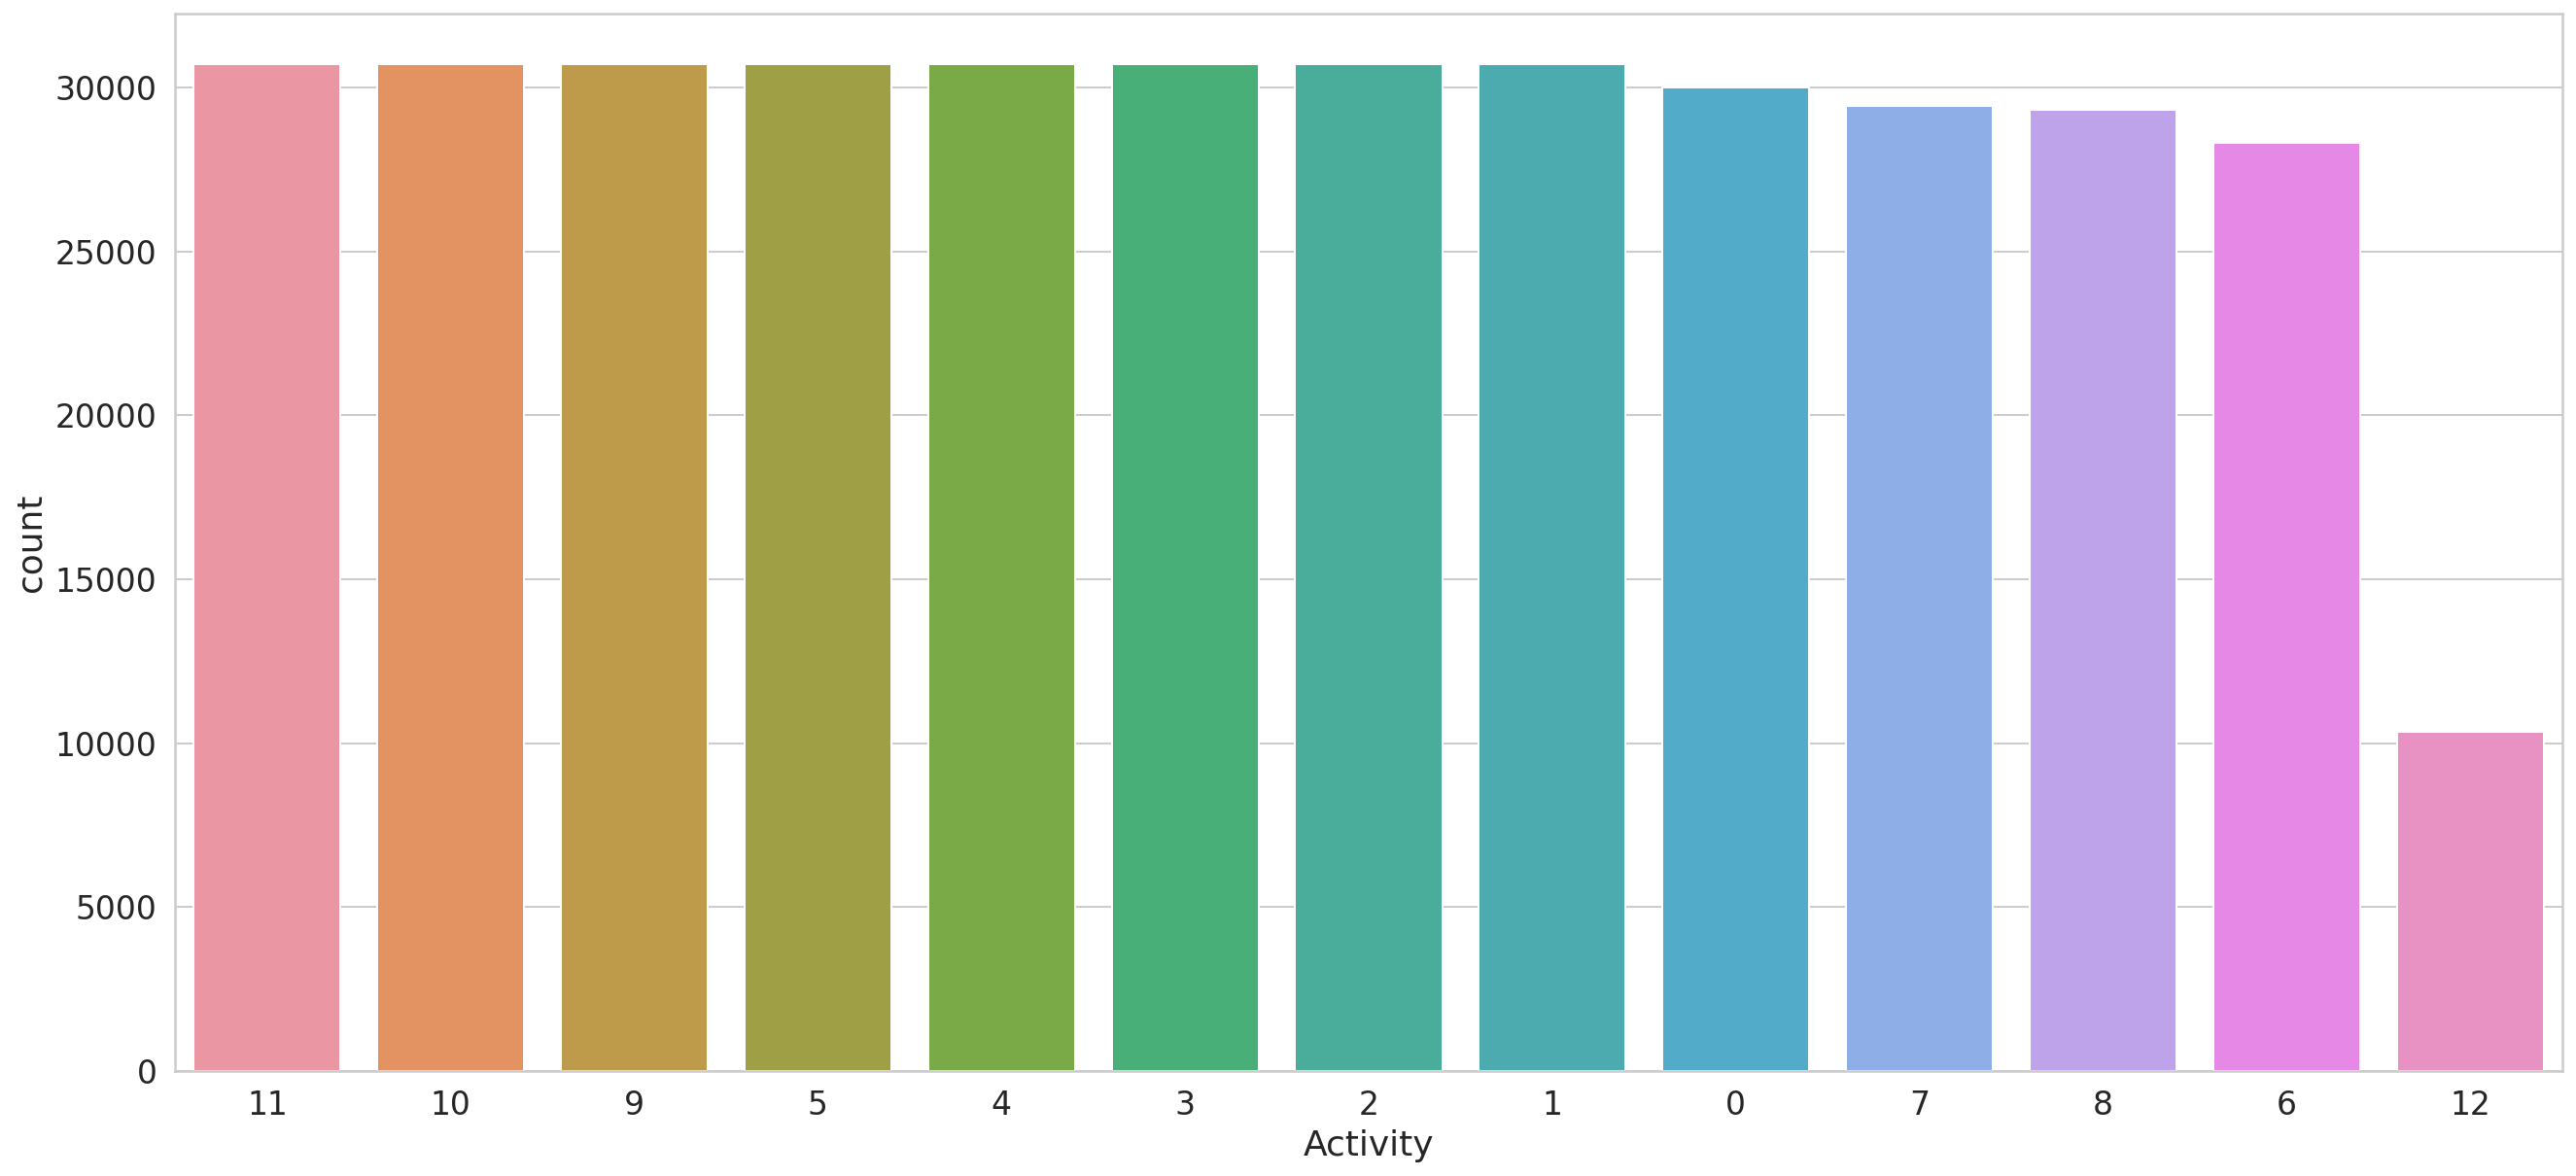

In [9]:
sns.countplot(x = 'Activity',
              data = df,
              order = df.Activity.value_counts().index);

In [10]:
df.shape

(373195, 14)

In [11]:
df.to_csv('/content/drive/MyDrive/mhealth_resampled_data.csv',index = False)